In [29]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)

In [71]:
url <- "https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS"
tennis <- read_csv(url)
colnames(tennis) <- make.names(colnames(tennis))
tennis <- tennis |>
    select(Age,  Current.Rank, Best.Rank, Prize.Money, Seasons)|>
    separate(col = Age,
             into= c("age", "Date"),
             sep = " ",
            convert = TRUE) |>
    separate(col = Current.Rank,
             into= c("current_rank", "date_of_rank"),
             sep = " ",
            convert = TRUE) |>
    separate(col = Best.Rank,
             into= c("best_rank", "date_or_best_rank"),
             sep = " ",
            convert = TRUE) |>
    select(age, current_rank, best_rank, Prize.Money, Seasons)

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [72]:
tennis$Prize.Money <- gsub("US", "", tennis$Prize.Money)
tennis$Prize.Money <- gsub("all-time leader in earnings", "", tennis$Prize.Money)
tennis$Prize.Money <- gsub("11th", "", tennis$Prize.Money)
tennis$Prize.Money <- gsub("24th", "", tennis$Prize.Money)
tennis$Prize.Money <- gsub("10th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("14th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("27th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("15th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("30th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("All-time leader in earnings", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("4th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("28th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("2nd", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("6th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("33rd", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("26th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("24th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("48th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("41st", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("\\$","", tennis$Prize.Money)
tennis$Prize.Money <- sub(" ", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("   ", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("  ", "", tennis$Prize.Money)
tennis$Prize.Money <- sub(" all-time in earnings", "", tennis$Prize.Money)
tennis$Prize.Money <- gsub(",", "", tennis$Prize.Money)

tennis <- tennis |>
        rename(seasons_played = Seasons)

In [73]:
tennis <- tennis |>
    mutate(prize_money = as.numeric(Prize.Money)) |>
    select(age, current_rank, best_rank, seasons_played, prize_money) |>
    na.omit()
tennis

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


age,current_rank,best_rank,seasons_played,prize_money
<int>,<int>,<int>,<dbl>,<dbl>
32,178,44,14,3261567
21,236,130,2,374093
27,183,17,11,6091971
22,31,31,5,1517157
28,307,213,1,278709
21,232,229,1,59123
25,417,253,5,122734
20,104,104,3,74927
19,22,17,3,1893476


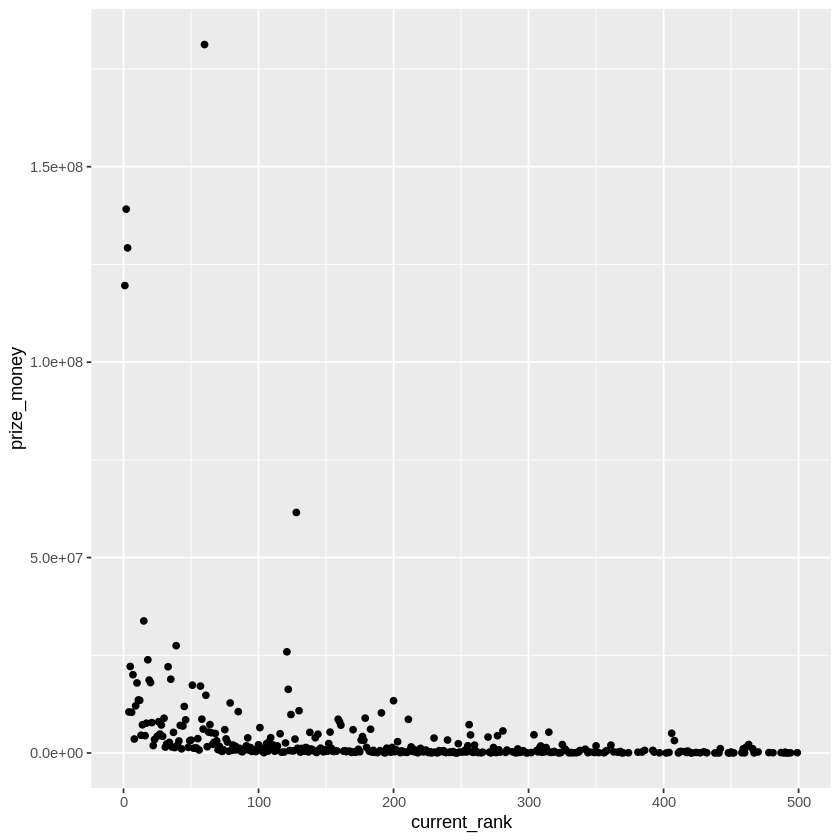

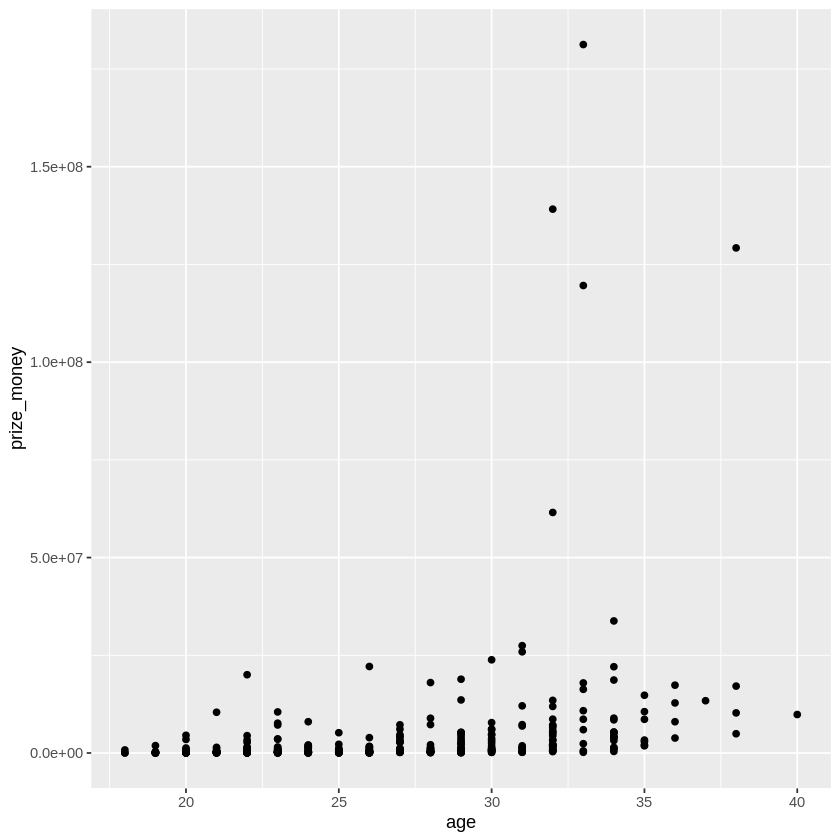

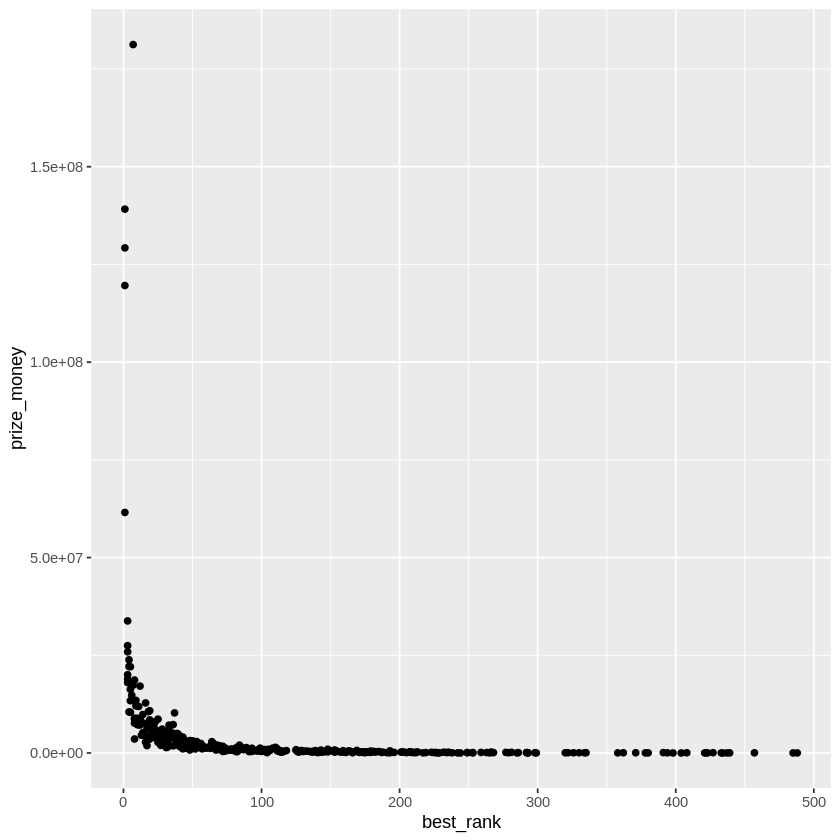

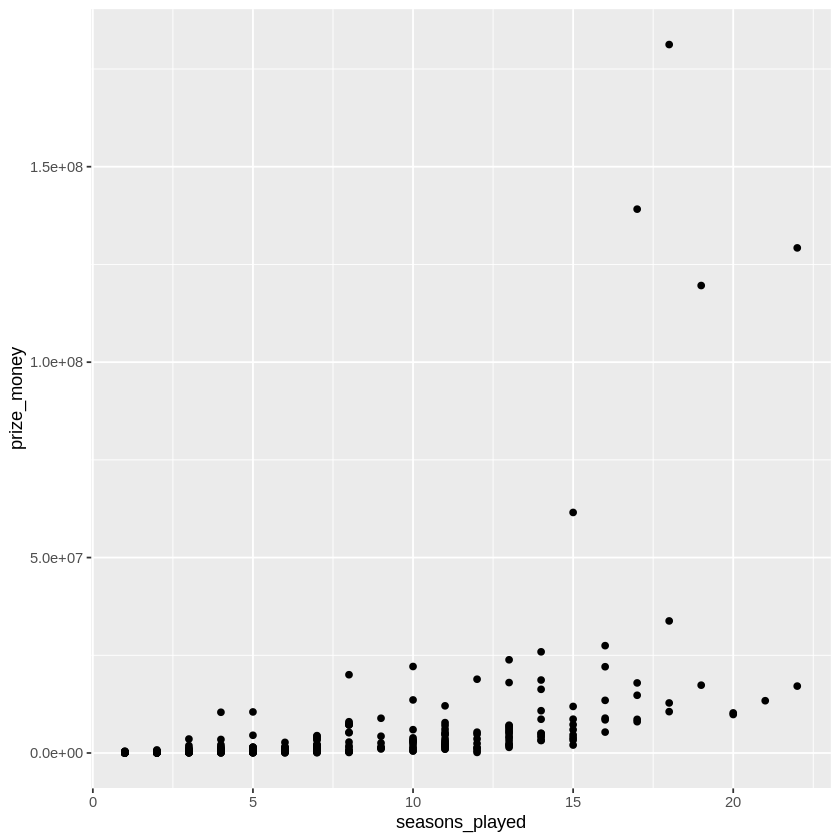

In [76]:
ggplot(tennis, aes(x=current_rank,y=prize_money))+
    geom_point()
ggplot(tennis, aes(x=age,y=prize_money))+
    geom_point()
ggplot(tennis, aes(x=best_rank,y=prize_money))+
    geom_point()
ggplot(tennis, aes(x=seasons_played,y=prize_money))+
    geom_point()